# Topics of Sociability and Solidarity in Recollections of *All* Survivors of Auschwitz-Birkenau

### Research Questions:

- If one watches testimonies of Birkenau survivors for long, what is the probability that she hears survivors speaking about solidarity and sociability? Are they frequent and recurrent elements of survivors' recollections? Or are they rare topics and survivors rather focus their attention on other topics?
- Compared to the probability of other rare or frequent events in Birkenau, are topics related to solidarity and sociability more or less probable in the narration of survivors?

## Load the relevant data

Load the libraries needed to work with the data

In [1]:
import constants
import pandas as pd
import os
from IPython.display import display

Set up the paths to data

In [2]:
input_directory = constants.output_data_markov_modelling

path = os.getcwd()
parent = os.path.abspath(os.path.join(path, os.pardir))
input_directory = parent +'/'+ constants.output_data_markov_modelling

Load the stationary probability of different topics in the recollections of survivors

In [3]:
p_complete = pd.read_csv(input_directory+'/'+'complete'+'/'+'stationary_probs.csv')

Use the line below for normalization

In [4]:
#p_complete['stationary_prob'] = p_complete[p_complete.topic_name=='living conditions']['stationary_prob'].values[0] / p_complete['stationary_prob']

Show the 25 most significant topics

In [5]:
display(p_complete[0:25])

,Unnamed: 0,topic_name,stationary_prob
0,0,selections,0.058627
1,1,intake procedures,0.052601
2,2,living conditions,0.046104
3,3,forced labor,0.041327
4,4,food,0.033895
5,5,mass murder awareness,0.031158
6,6,camp adaptation methods,0.024257
7,7,departure,0.023512
8,8,Appell,0.022992
9,9,housing conditions,0.018727


## Identify relevant topics

### Identify the facto significant and everyday events

Identify "selection"

In [6]:
selection = p_complete[p_complete.topic_name=='selections']['stationary_prob'].values[0]

Identify "Appell"

In [7]:
Appell = p_complete[p_complete.topic_name=='Appell']['stationary_prob'].values[0]

Identify "clothes"

In [8]:
clothes = p_complete[p_complete.topic_name=='clothing']['stationary_prob'].values[0]

Identify "tattoo"

In [9]:
tattoo = p_complete[p_complete.topic_name=='prisoner tattoos']['stationary_prob'].values[0]

### Identify the facto rare events

In [10]:
escapes = p_complete[p_complete.topic_name=='escapes']['stationary_prob'].values[0]

### Identify topics related to sociability

Identify the topic relating to social relations

In [11]:
social_bonds = p_complete[p_complete.topic_name=='social relations']['stationary_prob'].values[0]

### Identify topics related to acts of solidarity

In [12]:
aid_giving = p_complete[p_complete.topic_name=='aid giving']['stationary_prob'].values[0]

## Observation 1

### Qualitative description:

The topic describing various forms of solidarity ("aid giving") is more probable than "tattoos"; yet is the 13th most probable topic. It is therefore part of the upper quartile that contains the most probable topics addressed by survivors.

### Quantitative evidence

In [13]:
print (aid_giving)

0.014548180249024982


In [39]:
display(p_complete[p_complete.topic_name=='aid giving'])

,Unnamed: 0,topic_name,stationary_prob
12,12,aid giving,0.014548


In [14]:
print (tattoo)

0.009882137834325884


In [15]:
print (aid_giving/tattoo)

1.4721693314670707


In [16]:
upper_quantile = p_complete.stationary_prob.quantile([0.75]).values[0]
print (upper_quantile)

0.000858599111778128


In [17]:
print (aid_giving>upper_quantile)

True


## Observation 2

### Qualitative description:

The topic describing various forms of solidarity ("aid giving") is significantly more probable
(20 times) than "Escape".

### Quantitative evidence

In [18]:
print (aid_giving)

0.014548180249024982


In [19]:
print (escapes)

0.0007082856710417836


In [20]:
print (aid_giving/escapes)

20.53998950399033


## Observation 3

### Qualitative description:

The topic describing various forms of social activity ("social relations") is more significant than tattoo; it is the 17th most probable topic, and it is also part of the upper quartile. It is also more probable (18 times) than escapes .

### Quantitative evidence

In [40]:
print (social_bonds)

0.01273429298561786


In [42]:
display(p_complete[0:18])

,Unnamed: 0,topic_name,stationary_prob
0,0,selections,0.058627
1,1,intake procedures,0.052601
2,2,living conditions,0.046104
3,3,forced labor,0.041327
4,4,food,0.033895
5,5,mass murder awareness,0.031158
6,6,camp adaptation methods,0.024257
7,7,departure,0.023512
8,8,Appell,0.022992
9,9,housing conditions,0.018727


In [43]:
print (social_bonds/Appell)

0.5538457388037695


In [46]:
print (social_bonds/tattoo)

1.2886172201914585


In [25]:
print (social_bonds>upper_quantile)

True


In [26]:
print (social_bonds/escapes)

17.979035163718045


## Observation 4

### Qualitative description:

The topic describing sociability is more significant (1.5 times) than memories related to clothes. Similarly, the topic describing acts of solidarity is more significant (1.7 times) than memories related to clothes.

# Comments
## Tim
- 1.2 is a low number, it would be important to know that it's actually  significant

## Gabor
- should we just say that "topic describing sociability is slightly more probable as topic indicating memories related to clothes", ie. leave out significance?
- alternatively, someone suggested this method to resolve this problem: https://thomasleeper.com/Rcourse/Tutorials/permutationtests.html

### Quantitative evidence

In [27]:
social_bonds/clothes

1.5049900279037864

In [28]:
display(p_complete[p_complete.topic_name=="clothing"])

,Unnamed: 0,topic_name,stationary_prob
25,25,clothing,0.008461


In [29]:
display(p_complete[p_complete.topic_name=="social bonds"])

,Unnamed: 0,topic_name,stationary_prob


In [30]:
aid_giving/clothes

1.7193625294829904

## Interpretation

In the recollections of survivors of Birkenau, memories related to sociability and acts of solidarity are highly probable and recurrent topics. They do recur in the narrations of many victims independently from each other. Survivors speak about them as often as about other everyday aspects and events of life in Birkenau. This suggests that neither sociability nor acts of solidarity were rare events in Birkenau. If they had been rare and sporadic, survivors would not have addressed them very often in their recollections either. They would discuss these topics as often as topics related to de facto rare events such as for instance escape. 

It is important to underline that survivors were not asked by interviewers to address solidarity and sociability. It was their decision to address these topics. The stationary probability measured above actually describe the overall probability that interviews with survivors go towards these topics.

Nevertheless this interpretation raises two questions to be addressed in the Discussion part:
- The fact that survivors recall occasions of solidarity or sociability does not indicate that they were frequent events in the past; they are just frequent in their memories
- They might recall them because they are always salient aspects of human life and not because they were frequent elements of everyday life in Birkenau


## Visualization

A word cloud rendering the stationary probability of key topics in recollections of Birkenau survivors. 

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [32]:
p_complete = pd.read_csv(input_directory+'/'+'complete'+'/'+'stationary_probs.csv')

In [33]:
#p_complete['stationary_prob_normalized'] = 1/(p_complete[p_complete.topic_name=='living conditions']['stationary_prob'].values[0] / p_complete['stationary_prob']) 
p_complete =  p_complete[0:30].append(p_complete[p_complete.topic_name=='escapes'])
wfreqs = p_complete.set_index('topic_name')['stationary_prob'].to_dict()

In [34]:
def black(word, font_size, position, orientation,
    font_path, random_state):
    if (word =="social relations") or (word =="aid giving") or (word =="friends") or (word =="food sharing"):
        return 'red'
    elif (word =="prisoner tattoos") or (word =="clothing") or (word == "escapes"):
        print (word)
        print (font_size)
        return 'blue'
    else:
        return 'black'

In [35]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', color_func=black,
                min_font_size = 10).generate_from_frequencies(wfreqs)

prisoner tattoos
24
clothing
22
escapes
12


In [36]:
wordcloud.font_path

'/miniconda3/lib/python3.7/site-packages/wordcloud/DroidSansMono.ttf'

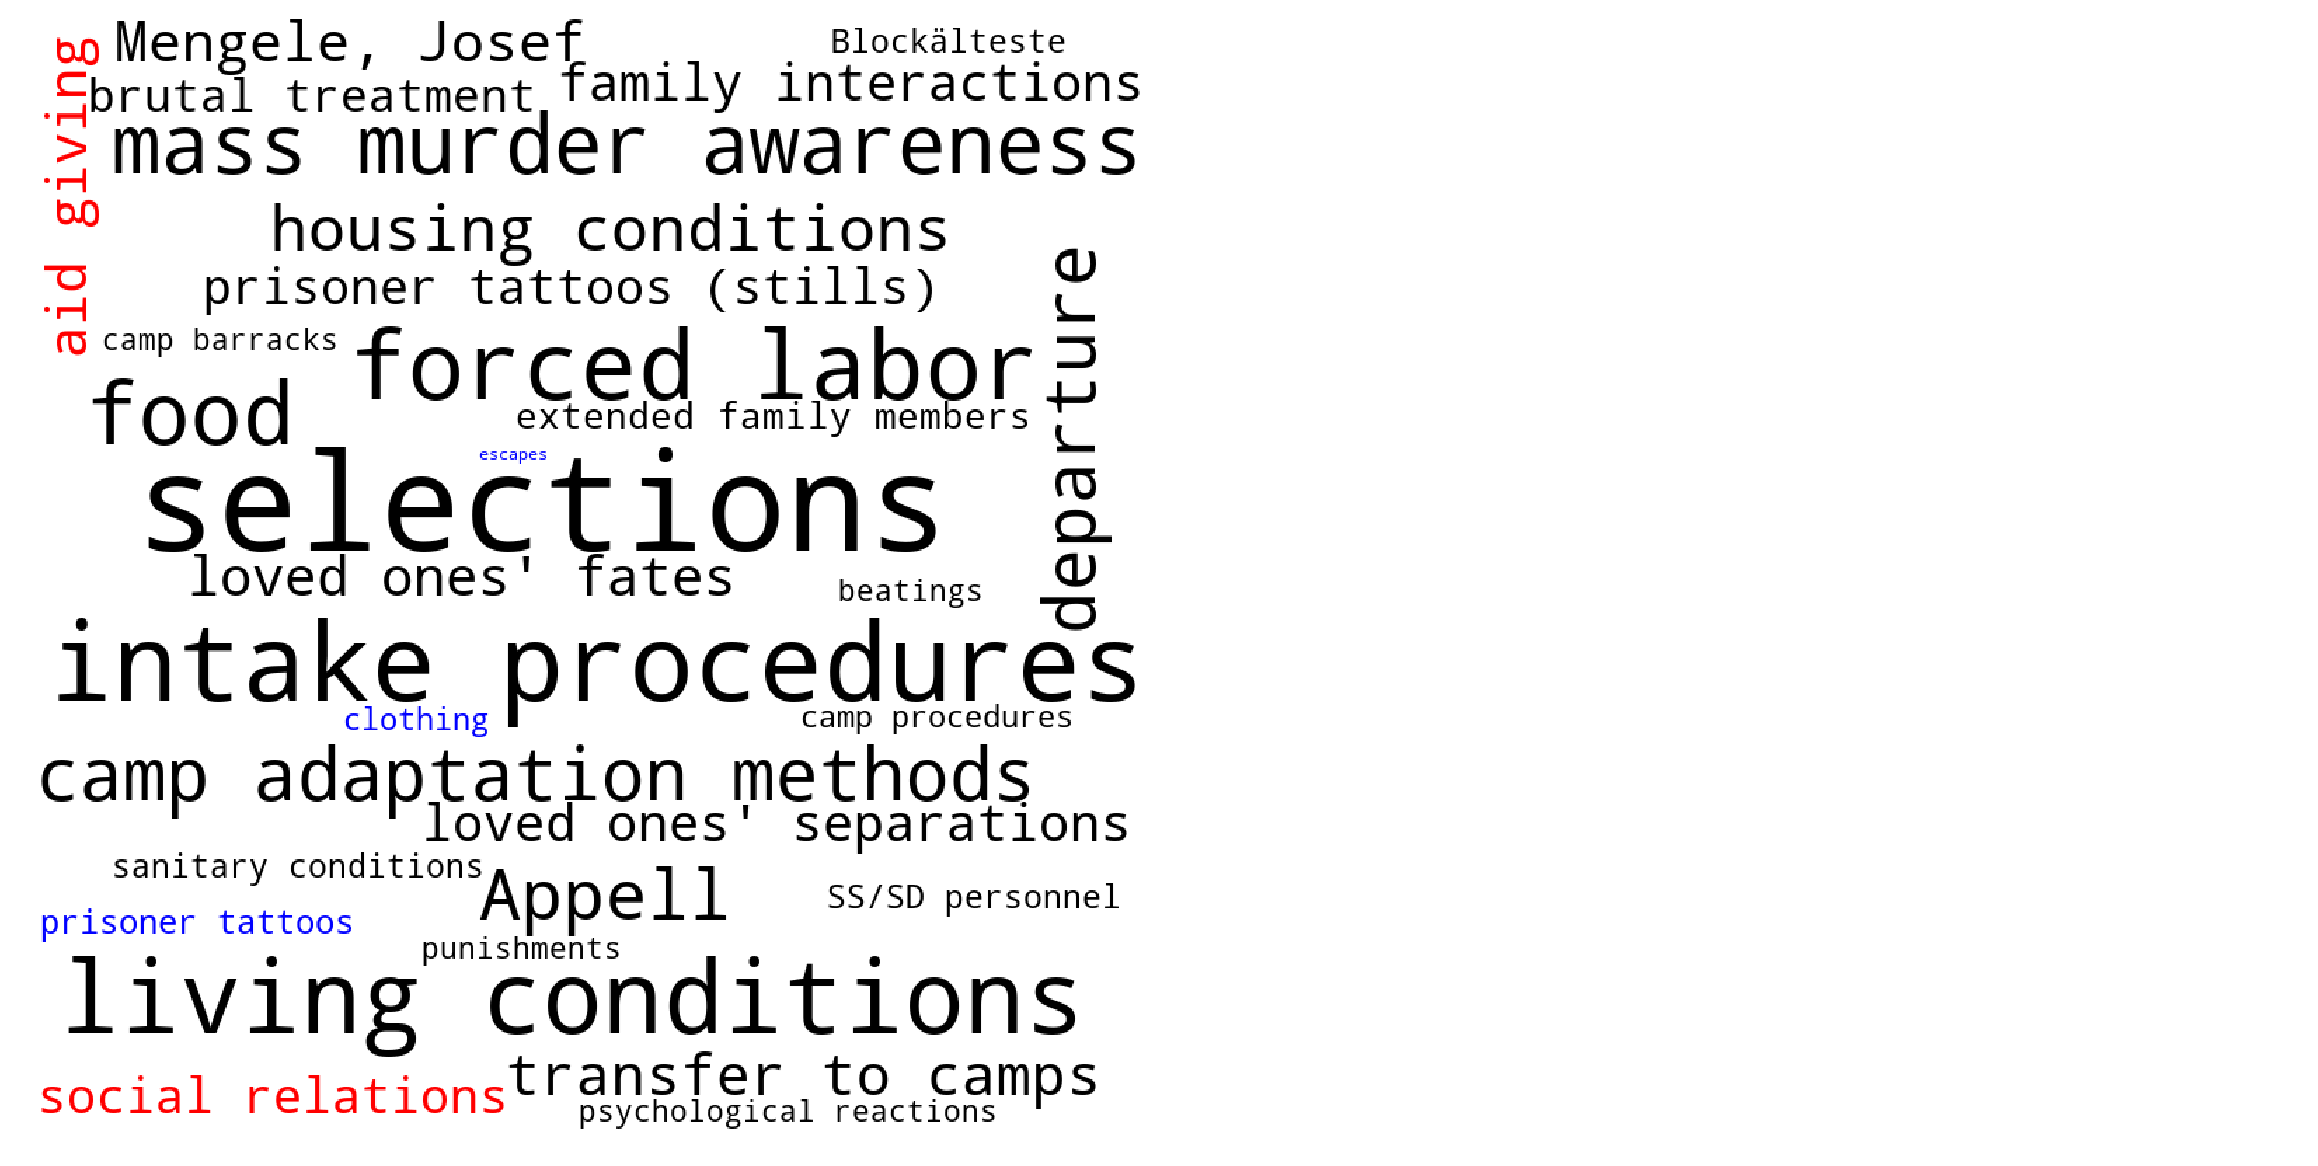

In [37]:
# plot the WordCloud image
fig, ax = plt.subplots(1, 2, figsize=(32, 16), facecolor=None)
 
ax[0].imshow(wordcloud)
for _ax in ax:
    _ax.axis("off") 
plt.tight_layout(pad=0) 